36059 Dataset hubgene prediction & model selection

In [40]:
import pandas as pd

# 读取表达矩阵（行为样本，列为基因 + 标签）
expression_df = pd.read_csv("gse36059.csv", index_col=0)

In [2]:
expression_df

,DDR1 /// MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193 /// UBA7,THRA,PTPN21,CCL5,CYP2E1,...,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,Diagnosis
GSM880204,9.808114,6.039012,5.810846,10.342781,3.211123,7.615631,5.473264,5.130847,5.967407,3.806599,...,8.405380,7.976476,7.577744,9.686881,9.287713,11.949707,11.562166,13.446336,13.311750,Non-rejecting
GSM880205,10.682125,6.608906,5.847419,10.667633,2.924908,8.282238,5.222516,4.620912,8.913122,4.053772,...,8.385829,8.377783,8.108189,10.007514,9.596678,12.094172,11.836863,13.640625,13.376220,Non-rejecting
GSM880206,9.659079,6.025781,6.089887,10.385927,3.191762,7.013927,5.483255,5.346077,5.872588,4.038955,...,8.621434,8.669645,8.406157,10.095641,9.831340,12.238378,11.861172,13.875352,13.715878,Non-rejecting
GSM880207,10.083274,6.254128,5.386257,10.383023,3.096177,7.217460,5.364841,4.968738,5.622734,7.228756,...,9.197614,9.086772,8.752838,10.489239,10.235579,12.551390,12.098305,13.951246,13.789232,Non-rejecting
GSM880208,10.460354,6.304075,5.550745,11.367598,3.059629,7.658014,5.402205,5.469187,4.728435,3.733386,...,8.391848,8.082121,8.007603,9.887173,9.587661,12.296905,11.817117,13.796431,13.553796,Non-rejecting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM880610,9.934819,5.786077,5.567057,10.392874,3.156632,7.294769,5.369574,5.101342,6.439260,3.589525,...,8.265206,8.087644,7.751108,9.891176,9.537927,11.972551,11.618292,13.642457,13.353197,Non-rejecting
GSM880611,10.331492,6.694437,5.935698,10.768941,3.277184,7.890006,5.652688,5.427916,7.976543,4.006042,...,8.048401,7.891162,7.706554,9.714787,9.397498,12.002003,11.617847,13.395456,13.256493,Mixed
GSM880612,10.434603,6.764096,6.189874,10.814140,3.115665,8.154171,5.165332,4.886810,8.652118,3.891277,...,7.330773,7.173659,7.095531,8.988399,8.574608,11.305505,10.803184,12.971723,12.677655,ABMR
GSM880613,10.172647,6.226061,5.550959,10.757275,3.154218,7.604247,5.295393,4.996001,6.927812,3.810087,...,8.184583,7.906788,7.629129,9.619145,9.333553,12.004095,11.629319,13.372509,13.103544,Non-rejecting


21374's interval Hubgene

In [2]:
hub_genes = ["CXCL9", "MIR155 /// MIR155HG", "CD8A", "CLIC2", "GBP5.1", "235229_at", "RP1-93H18.6"]

In [3]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Diagnosis"].apply(lambda x: 1 if x in ["TCMR", "ABMR", "Mixed"] else 0)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Logistic Regression Coefficients:
                  Gene  Coefficient
3                CLIC2     1.256477
5            235229_at     0.489816
1  MIR155 /// MIR155HG    -0.475565
0                CXCL9     0.279286
6          RP1-93H18.6    -0.172755
2                 CD8A     0.069670
4               GBP5.1     0.031526


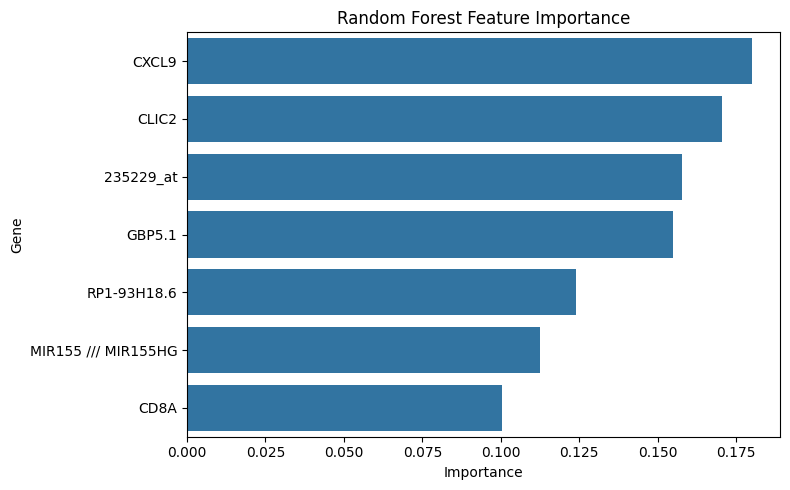


AUC - Logistic: 0.822
AUC - Random Forest: 0.794


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [6]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 基础模型（level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# 堆叠后的元模型（level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

# 训练 & 评估
stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.825


21374's cyto node hubgene

In [7]:
hub_genes = ["CXCL9", "GZMA", "CD8A", "IDO1", "CD69"]

In [8]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Diagnosis"].apply(lambda x: 1 if x in ["TCMR", "ABMR", "Mixed"] else 0)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Logistic Regression Coefficients:
    Gene  Coefficient
3   IDO1     0.772179
0  CXCL9     0.243775
4   CD69     0.198756
2   CD8A    -0.171763
1   GZMA    -0.062570


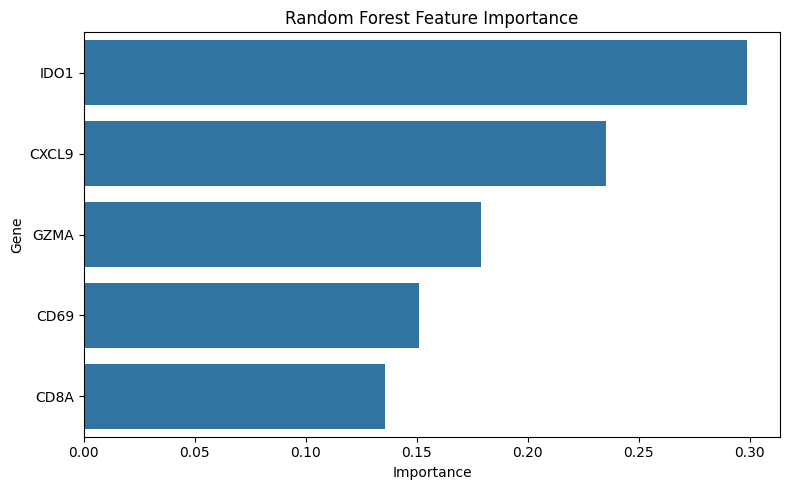


AUC - Logistic: 0.806
AUC - Random Forest: 0.763


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [12]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 基础模型（level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# 堆叠后的元模型（level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

# 训练 & 评估
stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.792


36059's interval hub gene

In [13]:
hub_genes = ["CCL4", "PLA1A", "FAM26F.1", "CXCL11", "RBP7", "IDO1"]

In [14]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Diagnosis"].apply(lambda x: 1 if x in ["TCMR", "ABMR", "Mixed"] else 0)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Logistic Regression Coefficients:
       Gene  Coefficient
1     PLA1A     0.389588
0      CCL4     0.319277
4      RBP7    -0.254291
2  FAM26F.1     0.226847
3    CXCL11     0.193681
5      IDO1     0.147211


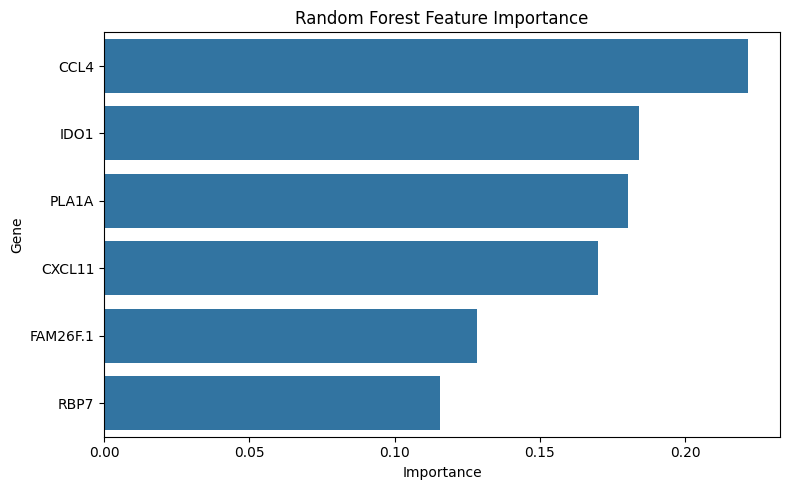


AUC - Logistic: 0.839
AUC - Random Forest: 0.842


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [17]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 基础模型（level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# 堆叠后的元模型（level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

# 训练 & 评估
stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.850


36059's cyto node hubgene

In [18]:
hub_genes = ["CXCL10", "IDO1", "LILRB2", "CXCL9", "CCL4"]

In [19]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Diagnosis"].apply(lambda x: 1 if x in ["TCMR", "ABMR", "Mixed"] else 0)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Logistic Regression Coefficients:
     Gene  Coefficient
1    IDO1     0.404301
4    CCL4     0.368130
2  LILRB2     0.363712
0  CXCL10     0.217504
3   CXCL9     0.036913


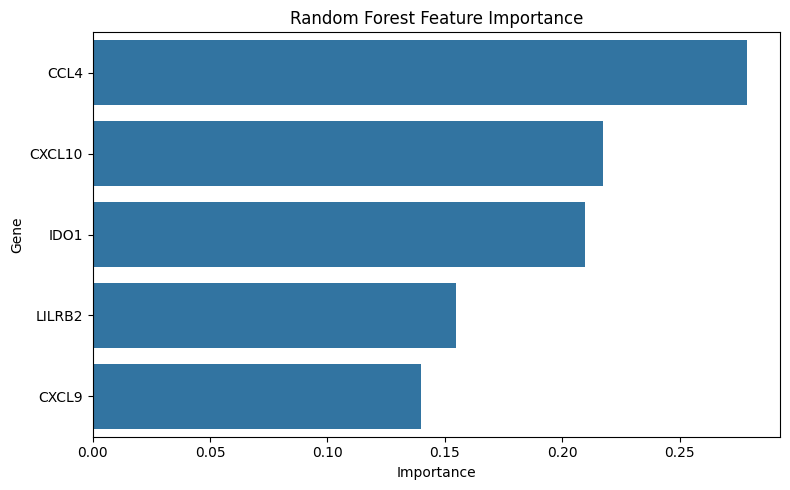


AUC - Logistic: 0.805
AUC - Random Forest: 0.796


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [22]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 基础模型（level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# 堆叠后的元模型（level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

# 训练 & 评估
stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.809


48581's interval hub gene

In [39]:
hub_genes = ["SCMH1", "WDR3", "LOC100507073"]

Logistic Regression Coefficients:
           Gene  Coefficient
0         SCMH1    -1.163216
1          WDR3     0.558516
2  LOC100507073     0.275316


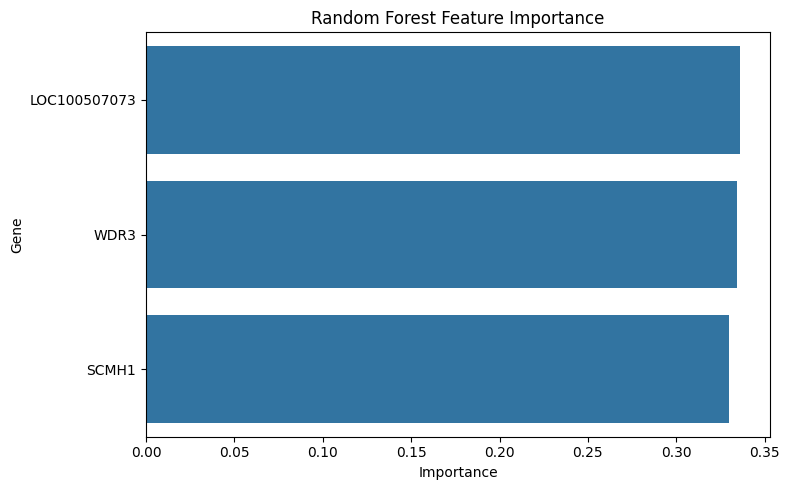


AUC - Logistic: 0.598
AUC - Random Forest: 0.534


In [41]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Diagnosis"].apply(lambda x: 1 if x in ["TCMR", "ABMR", "Mixed"] else 0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [42]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 基础模型（level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# 堆叠后的元模型（level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

# 训练 & 评估
stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.559


48581's cyto node hub gene

In [43]:
hub_genes = ["CXCL13", "LILRB2", "CD8A", "FOS", "RGS1"]

Logistic Regression Coefficients:
     Gene  Coefficient
1  LILRB2     1.498378
2    CD8A     0.671417
3     FOS    -0.251463
4    RGS1    -0.243310
0  CXCL13    -0.112273


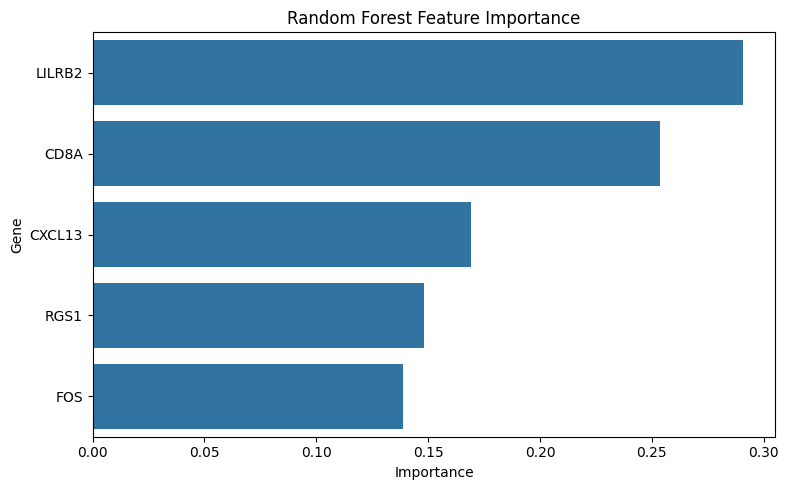


AUC - Logistic: 0.711
AUC - Random Forest: 0.690


In [45]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Diagnosis"].apply(lambda x: 1 if x in ["TCMR", "ABMR", "Mixed"] else 0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [46]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 基础模型（level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# 堆叠后的元模型（level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

# 训练 & 评估
stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.714


50058's interval hub gene

In [23]:
hub_genes = ["FAM26F.1", "GPR171", "229668_at", "B2M.2", "FAXDC2", "CCL4", "CXCL11", "SOST"]

Logistic Regression Coefficients:
        Gene  Coefficient
2  229668_at     0.804802
4     FAXDC2     0.615580
5       CCL4     0.466501
7       SOST    -0.449536
6     CXCL11     0.384549
0   FAM26F.1     0.202620
3      B2M.2     0.136388
1     GPR171     0.059961


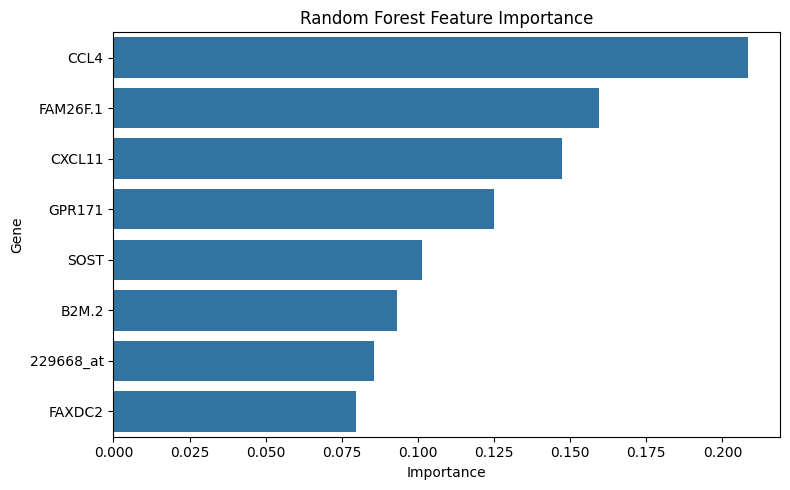


AUC - Logistic: 0.842
AUC - Random Forest: 0.823


In [24]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Diagnosis"].apply(lambda x: 1 if x in ["TCMR", "ABMR", "Mixed"] else 0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [25]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 基础模型（level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# 堆叠后的元模型（level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

# 训练 & 评估
stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.848


50058's cyto node hub gene

In [33]:
hub_genes = ["CXCL11", "B2M", "LCP2", "CCL4",  "FCGR3B"]

Logistic Regression Coefficients:
     Gene  Coefficient
3    CCL4     0.604173
0  CXCL11     0.423341
1     B2M    -0.277477
4  FCGR3B     0.074551
2    LCP2     0.025606


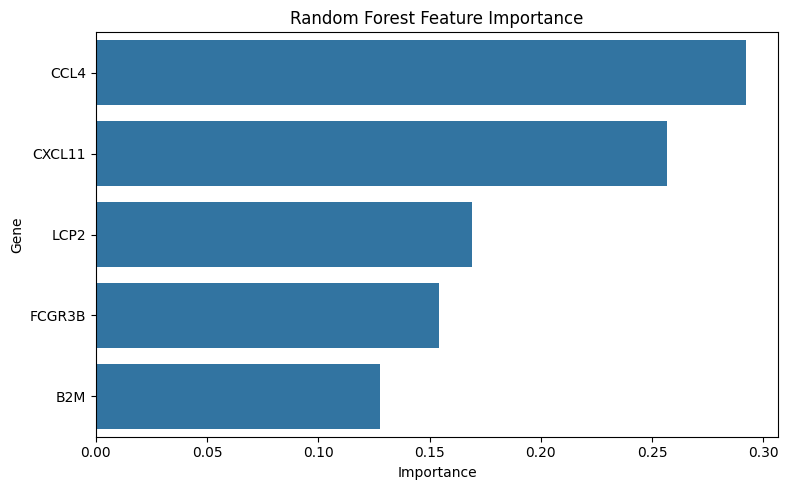


AUC - Logistic: 0.838
AUC - Random Forest: 0.845


In [34]:
X = expression_df[hub_genes]

# 处理标签（假设 'Rejection Status' 列存在）
y = expression_df["Diagnosis"].apply(lambda x: 1 if x in ["TCMR", "ABMR", "Mixed"] else 0)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic 回归模型（解释性强）
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# 打印 Logistic 的权重
coef_df = pd.DataFrame({
    "Gene": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)
print("Logistic Regression Coefficients:")
print(coef_df)

# 随机森林模型（增强性能）
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 打印重要性
importances_df = pd.DataFrame({
    "Gene": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# 可视化重要性
plt.figure(figsize=(8, 5))
sns.barplot(data=importances_df, x="Importance", y="Gene")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# 打印模型效果
print(f"\nAUC - Logistic: {lr_auc:.3f}")
print(f"AUC - Random Forest: {rf_auc:.3f}")

In [38]:
#### STACKING MODEL
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 基础模型（level-0）
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# 堆叠后的元模型（level-1）
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),  # 也可以用 SVM 等
    cv=5
)

# 训练 & 评估
stacked_model.fit(X_train, y_train)
stacked_auc = roc_auc_score(y_test, stacked_model.predict_proba(X_test)[:, 1])
print(f" Stacking AUC: {stacked_auc:.3f}")

 Stacking AUC: 0.840
